This a jupyter notebook for performing data analysis on the hypothyroid dataset from the UCI ML repository.

link to source: https://archive.ics.uci.edu/ml/datasets/thyroid+disease

The following code chunk ran in R on a Jupyter Server. For anyone who wants to reproduce it, please use a Jupyter Server that has support for the R language and packages. 

In [1]:
# install.packages("leaps")

In [2]:
# required packages
library(tidyverse)
library(rpart)
library(MASS)
library(leaps)
library(caret)
library(rpart)
library(e1071)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [4]:
# load data
data<-read.csv("hypothyroid_data.csv",header=FALSE)
colnames(data)<-c("class","age","sex","on_thyroxine","query_on_thyroxine","on_antithyroid_medication","thyroid_surgery","query_hypothyroid","query_hyperthyroid","pregnant","sick","tumor","lithium","goitre","TSH_measured","TSH","T3_measured","T3","TT4_measured","TT4","T4U_measured","T4U","FTI_measured","FTI","TBG_measured","TBG")
head(data)

,class,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,⋯,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,hypothyroid,72,M,f,f,f,f,f,f,f,⋯,y,0.60,y,15,y,1.48,y,10,n,?
2,hypothyroid,15,F,t,f,f,f,f,f,f,⋯,y,1.70,y,19,y,1.13,y,17,n,?
3,hypothyroid,24,M,f,f,f,f,f,f,f,⋯,y,0.20,y,4,y,1,y,0,n,?
4,hypothyroid,24,F,f,f,f,f,f,f,f,⋯,y,0.40,y,6,y,1.04,y,6,n,?
5,hypothyroid,77,M,f,f,f,f,f,f,f,⋯,y,1.20,y,57,y,1.28,y,44,n,?
6,hypothyroid,85,F,f,f,f,f,t,f,f,⋯,y,1.10,y,27,y,1.19,y,23,n,?


In [ ]:
count(data,"?")
table(data$TBG)

In [ ]:
data_drop<-subset(data, select=-c(TBG,TBG_measured))
head(data_drop)

In [ ]:
colSums(data=="?")

Creation of training and testing data

In [ ]:
set.seed(4)
train <- data%>%sample_frac(0.6)
train_index <- as.numeric(rownames(train))
test <- data[-train_index, ]

model<-rpart(class~on_thyroxine+query_on_thyroxine+on_antithyroid_medication+thyroid_surgery+query_hypothyroid+query_hyperthyroid+pregnant+sick+tumor+lithium+goitre,data=train)

prediction<-predict(model,newdata=test,type="class")
table(prediction,test$class)

In [ ]:
table(data$class)

Identify missing values, if any

In [ ]:
pos<-data%>%filter(class=="hypothyroid")
head(pos)
count(pos,"?")
colSums(pos=="?")


In [ ]:
agedata<-data%>%select(age,class)

agedata[agedata=="?"]<-NA
agedata<-na.omit(agedata)
agedata$age<-as.integer(agedata$age)
agedata$class<-as.integer(agedata$class)

agedata[agedata==2]<-0
agedata$class<-as.factor(agedata$class)

ggplot(data=agedata)+geom_boxplot(aes(x=class,y=age))
ggplot(data=agedata)+geom_histogram(aes(x=age))

In [2]:
#fresh start here
data<-read.csv("hypo2.csv")
#colnames(data)<-c("class","age","sex","on_thyroxine","query_on_thyroxine","on_antithyroid_medication","thyroid_surgery","query_hypothyroid","query_hyperthyroid","pregnant","sick","tumor","lithium","goitre","TSH_measured","TSH","T3_measured","T3","TT4_measured","TT4","T4U_measured","T4U","FTI_measured","FTI","TBG_measured","TBG")
data<-data[,2:25]
head(data)

,Class,Age,Sex,On_Thyroxine,Query_on_Thyroxine,On_Antithyroid_Medication,Thyroid_Surgery,Query_Hypothyroid,Query_Hyperthyroid,Pregnant,⋯,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>
1,hypothyroid,72,1,0,0,0,0,0,0,0,⋯,1,30.0,1,0.6,1,15,1,1.48,1,10
2,hypothyroid,15,0,1,0,0,0,0,0,0,⋯,1,145.0,1,1.7,1,19,1,1.13,1,17
3,hypothyroid,24,1,0,0,0,0,0,0,0,⋯,1,0.0,1,0.2,1,4,1,1.00,1,0
4,hypothyroid,24,0,0,0,0,0,0,0,0,⋯,1,430.0,1,0.4,1,6,1,1.04,1,6
5,hypothyroid,77,1,0,0,0,0,0,0,0,⋯,1,7.3,1,1.2,1,57,1,1.28,1,44
6,hypothyroid,85,0,0,0,0,0,1,0,0,⋯,1,138.0,1,1.1,1,27,1,1.19,1,23


In [3]:
colSums(data=="?")

Class                       Age                       Sex 
                        0                         0                         0 
             On_Thyroxine        Query_on_Thyroxine On_Antithyroid_Medication 
                        0                         0                         0 
          Thyroid_Surgery         Query_Hypothyroid        Query_Hyperthyroid 
                        0                         0                         0 
                 Pregnant                      Sick                    Tumour 
                        0                         0                         0 
                  Lithium                    Goitre              TSH_measured 
                        0                         0                         0 
                      TSH               T3_measured                        T3 
                        0                         0                         0 
             TT4_measured                       TT4              T4U_measured 
                        0                         0                         0 
                      T4U              FTI_measured                       FTI 
                        0                         0                         0

In [4]:
newdata<-data


newdata[1]<-lapply(newdata[1], gsub, pattern = "negative", replacement = 0, fixed = TRUE)
newdata[1]<-lapply(newdata[1], gsub, pattern = "hypothyroid", replacement = 1, fixed = TRUE)
newdata$Class<-as.factor(newdata$Class)

head(newdata)

,Class,Age,Sex,On_Thyroxine,Query_on_Thyroxine,On_Antithyroid_Medication,Thyroid_Surgery,Query_Hypothyroid,Query_Hyperthyroid,Pregnant,⋯,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>
1,1,72,1,0,0,0,0,0,0,0,⋯,1,30.0,1,0.6,1,15,1,1.48,1,10
2,1,15,0,1,0,0,0,0,0,0,⋯,1,145.0,1,1.7,1,19,1,1.13,1,17
3,1,24,1,0,0,0,0,0,0,0,⋯,1,0.0,1,0.2,1,4,1,1.00,1,0
4,1,24,0,0,0,0,0,0,0,0,⋯,1,430.0,1,0.4,1,6,1,1.04,1,6
5,1,77,1,0,0,0,0,0,0,0,⋯,1,7.3,1,1.2,1,57,1,1.28,1,44
6,1,85,0,0,0,0,0,1,0,0,⋯,1,138.0,1,1.1,1,27,1,1.19,1,23


Creating function for C_k criterion

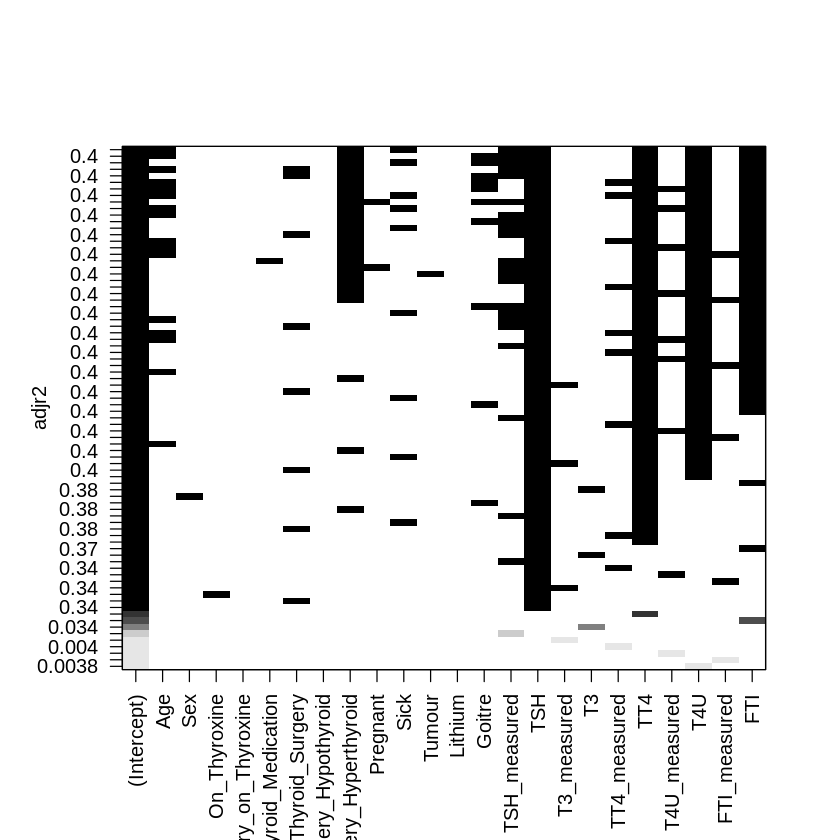

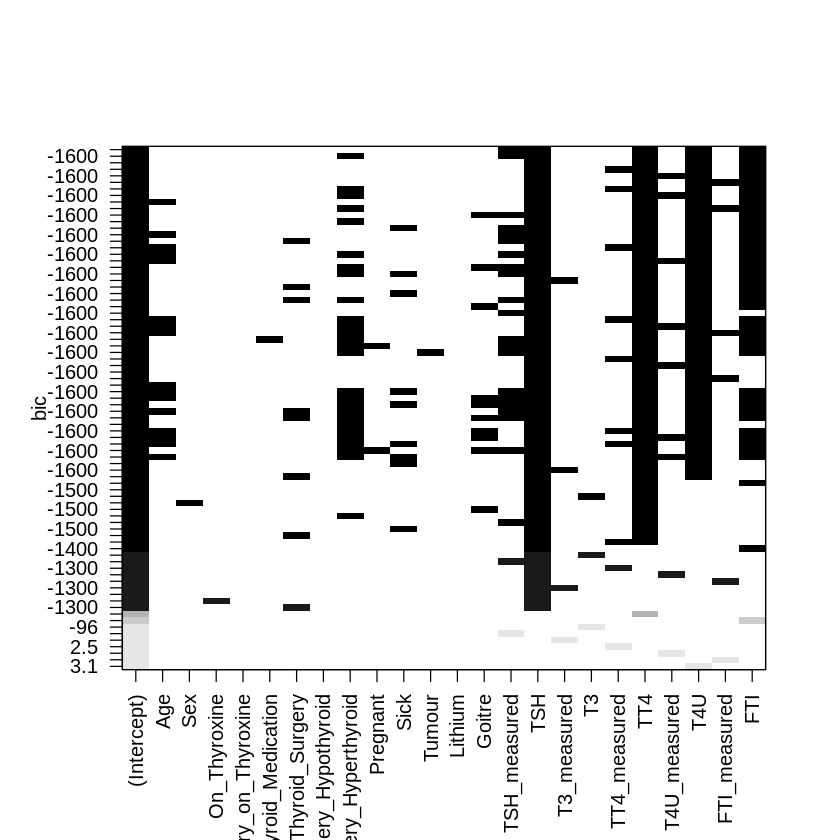

In [5]:
leaps.ck <- function (X, Y, nbest =3) 
  
  # call leaps using C_k criterion, make plot of C_k versus k,
  # and return leaps output in a matrix for nicer output.
  # The matrix has two columns: for k and for C_k. The row labels
  # contain the regression labels.
{
  
  leaps.out <- leaps(X,Y,method="Cp",nbest=nbest)
  
  leaps.mat <- cbind(leaps.out$size,round(leaps.out$Cp,digits=4))
  
  colnames(leaps.mat) <- c("k","C_k")
  
  leaps.mat <- cbind(leaps.out$which, leaps.mat)
  
  return(leaps.mat)
  
} 


### use "swiss" data ###

X <- as.matrix(newdata[,2:24])
Y <- as.matrix(newdata[,1])

#leaps.ck(X,Y)

result.leaps <- regsubsets(Class~.,data=newdata,nbest=10)
plot(result.leaps, scale="adjr2")
plot(result.leaps, scale="bic")

In [6]:
posdata<-newdata%>%filter(Class==1) #151
negdata<-newdata%>%filter(Class==0) #3012
#50/30/20
#76/45/30
#1506/904/602

set.seed(5)
pos_training_index<-sample.int(n=151,size=121,replace=FALSE)
neg_training_index<-sample.int(n=3012,size=2410,replace=FALSE)

pos_training<-posdata[pos_training_index,]
pos_testing<-posdata[-pos_training_index,]

neg_training<-negdata[neg_training_index,]
neg_testing<-negdata[-neg_training_index,]

pos_cv_index<-sample.int(n=121,size=45,replace=FALSE)
neg_cv_index<-sample.int(n=2410,size=904,replace=FALSE)

pos_cv<-pos_training[pos_cv_index,]
pos_training<-pos_training[-pos_cv_index,]

neg_cv<-neg_training[neg_cv_index,]
neg_training<-neg_training[-neg_cv_index,]

training<-rbind(pos_training,neg_training)
cv<-rbind(pos_cv,neg_cv)
test<-rbind(pos_testing,neg_testing)


Generalized Linear Model

In [7]:
logreg<-glm(Class ~ TSH+TT4+T4U+FTI, family = "binomial", data=training)
result.predict <- predict(logreg,as.data.frame(cv))
results<-result.predict>0.5
results<-lapply(results, gsub, pattern = TRUE, replacement = 1, fixed = TRUE)
results<-lapply(results, gsub, pattern = FALSE, replacement = 0, fixed = TRUE)
results<-as.factor(as.numeric(results))
confusionMatrix(results,cv$Class)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 900  18
         1   4  27
                                          
               Accuracy : 0.9768          
                 95% CI : (0.9651, 0.9854)
    No Information Rate : 0.9526          
    P-Value [Acc > NIR] : 8.361e-05       
                                          
                  Kappa : 0.6989          
                                          
 Mcnemar's Test P-Value : 0.005578        
                                          
            Sensitivity : 0.9956          
            Specificity : 0.6000          
         Pos Pred Value : 0.9804          
         Neg Pred Value : 0.8710          
             Prevalence : 0.9526          
         Detection Rate : 0.9484          
   Detection Prevalence : 0.9673          
      Balanced Accuracy : 0.7978          
                                          
       'Positive' Class : 0               
                              

Recursive Partioning and Regression Trees

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 903   4
         1   1  41
                                          
               Accuracy : 0.9947          
                 95% CI : (0.9877, 0.9983)
    No Information Rate : 0.9526          
    P-Value [Acc > NIR] : 2.059e-14       
                                          
                  Kappa : 0.9398          
                                          
 Mcnemar's Test P-Value : 0.3711          
                                          
            Sensitivity : 0.9989          
            Specificity : 0.9111          
         Pos Pred Value : 0.9956          
         Neg Pred Value : 0.9762          
             Prevalence : 0.9526          
         Detection Rate : 0.9515          
   Detection Prevalence : 0.9557          
      Balanced Accuracy : 0.9550          
                                          
       'Positive' Class : 0               
                              

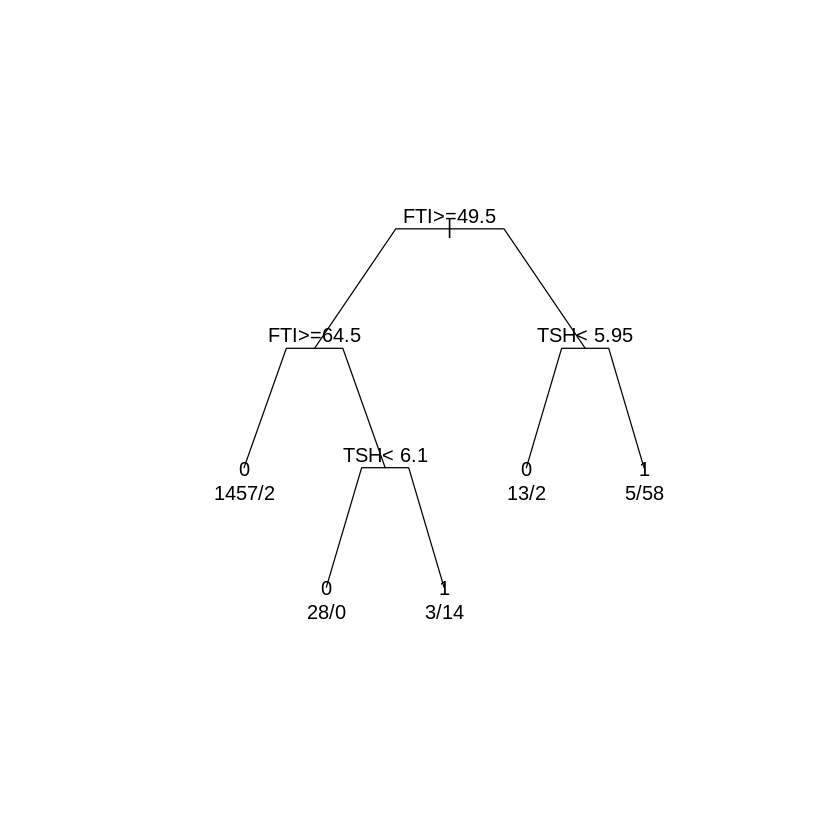

In [8]:
result.tree <- rpart(Class~TSH+TT4+T4U+FTI, data=training)
plot(result.tree, uniform=TRUE, compress=TRUE,margin=0.3, branch=0.4)
text(result.tree, use.n=T)
result.predict <- predict(result.tree,as.data.frame(cv))
predict.index <- rep(1, nrow(result.predict))
predict.index[result.predict[,1] >=0.5] <- 0
#results<-result.predict>0.5
#results<-lapply(results, gsub, pattern = TRUE, replacement = 1, fixed = TRUE)
#results<-lapply(results, gsub, pattern = FALSE, replacement = 0, fixed = TRUE)
#results<-as.factor(as.numeric(results))
confusionMatrix(as.factor(predict.index),cv$Class)


Naive Bayes Model

In [9]:
nbmodel<-naiveBayes(Class~TSH+TT4+T4U+FTI, data=training)
result.predict <- predict(nbmodel,as.data.frame(cv))
confusionMatrix(result.predict,cv$Class)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 894  12
         1  10  33
                                          
               Accuracy : 0.9768          
                 95% CI : (0.9651, 0.9854)
    No Information Rate : 0.9526          
    P-Value [Acc > NIR] : 8.361e-05       
                                          
                  Kappa : 0.7379          
                                          
 Mcnemar's Test P-Value : 0.8312          
                                          
            Sensitivity : 0.9889          
            Specificity : 0.7333          
         Pos Pred Value : 0.9868          
         Neg Pred Value : 0.7674          
             Prevalence : 0.9526          
         Detection Rate : 0.9420          
   Detection Prevalence : 0.9547          
      Balanced Accuracy : 0.8611          
                                          
       'Positive' Class : 0               
                              

Linear Discriminant Analysis

Call:
lda(Class ~ T4U + TSH + TT4 + FTI, data = training)

Prior probabilities of groups:
         0          1 
0.95195954 0.04804046 

Group means:
        T4U       TSH       TT4       FTI
0 0.9873373  2.302324 113.64097 118.06175
1 1.0734211 66.163816  33.87237  31.79211

Coefficients of linear discriminants:
             LD1
T4U  2.077368054
TSH  0.041081807
TT4 -0.018027286
FTI  0.004491198

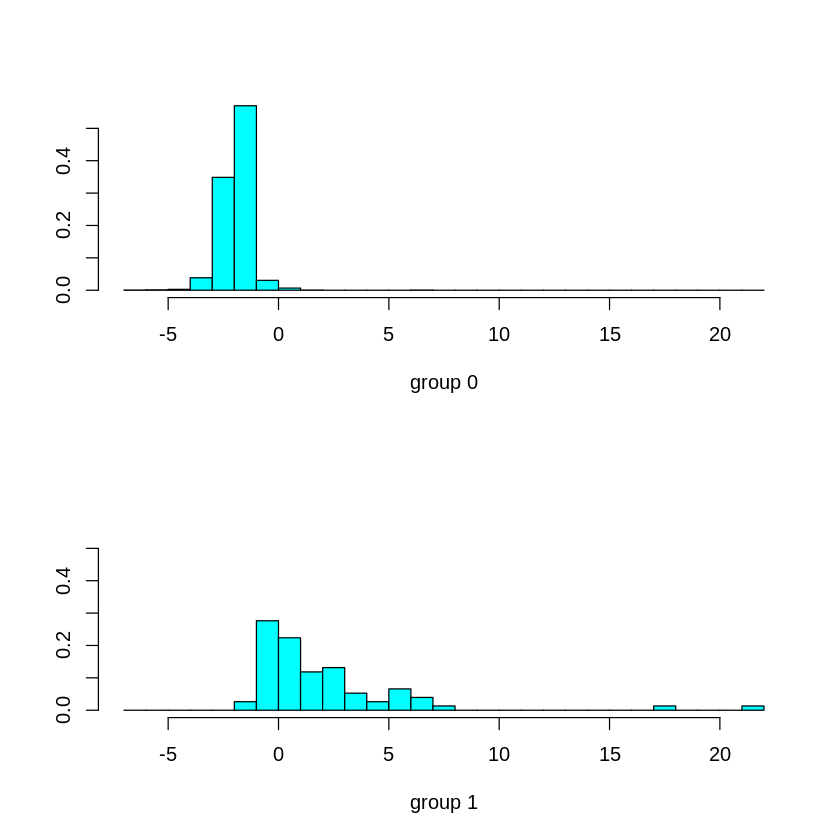

In [10]:
set.seed(42)
fit.lda<-lda(Class ~ T4U + TSH + TT4 + FTI, data=training)
fit.lda
plot(fit.lda)
pred_lda = predict(fit.lda, newdata = cv)
# pred_lables <- rep('hypothyroid', nrow(test))

# pred_lables[pred_lda>0.5] <- "hy"
# pred_lables <- as.factor(pred_lables)


In [11]:
cm_lda <- confusionMatrix(pred_lda$class,cv$Class) 
cm_lda$overall['Accuracy']
cm_lda$byClass['Specificity'] 
cm_lda$byClass['Sensitivity'] 
cm_lda

Accuracy 
0.9683878

Specificity 
        0.4

Sensitivity 
  0.9966814

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 901  27
         1   3  18
                                          
               Accuracy : 0.9684          
                 95% CI : (0.9552, 0.9786)
    No Information Rate : 0.9526          
    P-Value [Acc > NIR] : 0.01012         
                                          
                  Kappa : 0.5313          
                                          
 Mcnemar's Test P-Value : 2.679e-05       
                                          
            Sensitivity : 0.9967          
            Specificity : 0.4000          
         Pos Pred Value : 0.9709          
         Neg Pred Value : 0.8571          
             Prevalence : 0.9526          
         Detection Rate : 0.9494          
   Detection Prevalence : 0.9779          
      Balanced Accuracy : 0.6983          
                                          
       'Positive' Class : 0               
                              

Random Forests

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin





Call:
 randomForest(formula = Class ~ T4U + TSH + TT4 + FTI, data = training) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 1.26%
Confusion matrix:
     0  1 class.error
0 1496 10 0.006640106
1   10 66 0.131578947

mtry = 4  OOB error = 1.58% 
Searching left ...
mtry = 2 	OOB error = 1.71% 
-0.08 0.05 
Searching right ...
mtry = 8 	OOB error = 1.33% 
0.16 0.05 
mtry = 16 	OOB error = 1.2% 
0.0952381 0.05 
mtry = 23 	OOB error = 1.14% 
0.05263158 0.05 


,mtry,OOBError
2.OOB,2,0.01706700
4.OOB,4,0.01580278
8.OOB,8,0.01327434
16.OOB,16,0.01201011
23.OOB,23,0.01137800


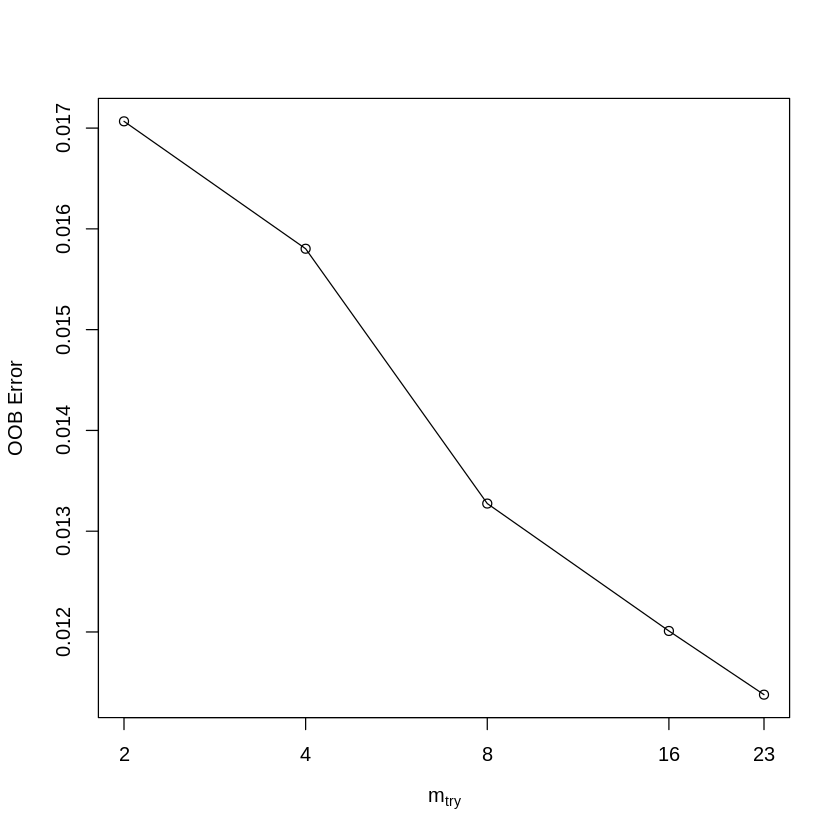

In [12]:
library(randomForest)
set.seed(42)
#OOB is out of bag estimate, predicts the error or the random forests
rf <- randomForest(Class ~ T4U + TSH + TT4 + FTI, data= training)
rf

train_x <- training %>% dplyr::select(-"Class")
train_y<-training[,'Class']
tuneRF(train_x, train_y, ntreeTry = 500)

In [13]:
fit.rf<- randomForest(Class ~ T4U + TSH + TT4 + FTI, data= training, mtry=23, ntree = 500) 
fit.rf

Warning message in randomForest.default(m, y, ...):
“invalid mtry: reset to within valid range”



Call:
 randomForest(formula = Class ~ T4U + TSH + TT4 + FTI, data = training,      mtry = 23, ntree = 500) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 1.45%
Confusion matrix:
     0  1 class.error
0 1495 11 0.007304117
1   12 64 0.157894737

In [14]:
predictions.rf<- predict(fit.rf, newdata=cv, type="class")
confusionMatrix(predictions.rf, cv$Class) 


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 902   5
         1   2  40
                                         
               Accuracy : 0.9926         
                 95% CI : (0.9849, 0.997)
    No Information Rate : 0.9526         
    P-Value [Acc > NIR] : 1.134e-12      
                                         
                  Kappa : 0.9157         
                                         
 Mcnemar's Test P-Value : 0.4497         
                                         
            Sensitivity : 0.9978         
            Specificity : 0.8889         
         Pos Pred Value : 0.9945         
         Neg Pred Value : 0.9524         
             Prevalence : 0.9526         
         Detection Rate : 0.9505         
   Detection Prevalence : 0.9557         
      Balanced Accuracy : 0.9433         
                                         
       'Positive' Class : 0              
                                         